# CNN for Multi-class Image Classification

### Step 0: Setup and Imports

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

print(f'Tensorflow: {tf.__version__}')

Tensorflow: 2.18.0


### Step 1: Load & Preprocess Data

#### MNSIT

In [5]:
# Load and preprocess the data for CNN
(x_train_mnist, y_train_mnist),(x_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()
x_train_mnist = np.expand_dims(x_train_mnist, -1).astype('float32')/255.0
x_test_mnist = np.expand_dims(x_test_mnist, -1).astype('float32')/255.0

#### CIFAR-10

In [6]:
# load and preprocess the data for CNN
(x_train_cifar10, y_train_cifar10),(x_test_cifar10, y_test_cifar10) = tf.keras.datasets.cifar10.load_data()
x_train_cifar10 = x_train_cifar10.astype('float32')/255.0
x_test_cifar10 = x_test_cifar10.astype('float32')/255.0

# Flatten targets
y_train_cifar10 = y_train_cifar10.flatten()
y_test_cifar10 = y_test_cifar10.flatten()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


### Step 2: Define the Models with 2 layers

#### MNIST

In [8]:
model_mnist = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#### CIFAR10

In [10]:
model_cifar10 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

### Step 3: Compile the models

#### For both mnist, cifar10

In [15]:
model_mnist.compile(optimizer=tf.keras.optimizers.Adam(),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])
model_cifar10.compile(optimizer=tf.keras.optimizers.Adam(),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

### Step 4: Train

#### MNIST

In [16]:
history_mnist = model_mnist.fit(
    x_train_mnist, y_train_mnist,
    validation_split = .1,
    epochs = 10,
    batch_size=128,
    verbose=2
)

Epoch 1/10
422/422 - 21s - 51ms/step - accuracy: 0.9332 - loss: 0.2316 - val_accuracy: 0.9828 - val_loss: 0.0598
Epoch 2/10
422/422 - 18s - 44ms/step - accuracy: 0.9819 - loss: 0.0587 - val_accuracy: 0.9865 - val_loss: 0.0471
Epoch 3/10
422/422 - 18s - 42ms/step - accuracy: 0.9886 - loss: 0.0391 - val_accuracy: 0.9862 - val_loss: 0.0466
Epoch 4/10
422/422 - 17s - 41ms/step - accuracy: 0.9911 - loss: 0.0288 - val_accuracy: 0.9878 - val_loss: 0.0412
Epoch 5/10
422/422 - 18s - 42ms/step - accuracy: 0.9930 - loss: 0.0228 - val_accuracy: 0.9918 - val_loss: 0.0323
Epoch 6/10
422/422 - 18s - 42ms/step - accuracy: 0.9940 - loss: 0.0176 - val_accuracy: 0.9900 - val_loss: 0.0394
Epoch 7/10
422/422 - 18s - 42ms/step - accuracy: 0.9955 - loss: 0.0143 - val_accuracy: 0.9903 - val_loss: 0.0379
Epoch 8/10
422/422 - 18s - 42ms/step - accuracy: 0.9960 - loss: 0.0114 - val_accuracy: 0.9910 - val_loss: 0.0357
Epoch 9/10
422/422 - 18s - 42ms/step - accuracy: 0.9968 - loss: 0.0093 - val_accuracy: 0.9898 - 

#### CIFAR10

In [18]:
history_cifar10 = model_cifar10.fit(
    x_train_cifar10, y_train_cifar10,
    epochs=10,
    batch_size=128,
    validation_split=.1,
    verbose=2
)

Epoch 1/10
352/352 - 24s - 67ms/step - accuracy: 0.4205 - loss: 1.6032 - val_accuracy: 0.5414 - val_loss: 1.2962
Epoch 2/10
352/352 - 22s - 62ms/step - accuracy: 0.5630 - loss: 1.2418 - val_accuracy: 0.6008 - val_loss: 1.1508
Epoch 3/10
352/352 - 22s - 63ms/step - accuracy: 0.6164 - loss: 1.0922 - val_accuracy: 0.6452 - val_loss: 1.0319
Epoch 4/10
352/352 - 22s - 61ms/step - accuracy: 0.6529 - loss: 0.9975 - val_accuracy: 0.6686 - val_loss: 0.9609
Epoch 5/10
352/352 - 22s - 63ms/step - accuracy: 0.6788 - loss: 0.9282 - val_accuracy: 0.6790 - val_loss: 0.9329
Epoch 6/10
352/352 - 22s - 61ms/step - accuracy: 0.6999 - loss: 0.8721 - val_accuracy: 0.6856 - val_loss: 0.9063
Epoch 7/10
352/352 - 22s - 62ms/step - accuracy: 0.7158 - loss: 0.8203 - val_accuracy: 0.7044 - val_loss: 0.8669
Epoch 8/10
352/352 - 22s - 62ms/step - accuracy: 0.7324 - loss: 0.7745 - val_accuracy: 0.6926 - val_loss: 0.8869
Epoch 9/10
352/352 - 21s - 61ms/step - accuracy: 0.7446 - loss: 0.7354 - val_accuracy: 0.7192 - 

### Step 5: Evaluate & Plot

#### MNIST

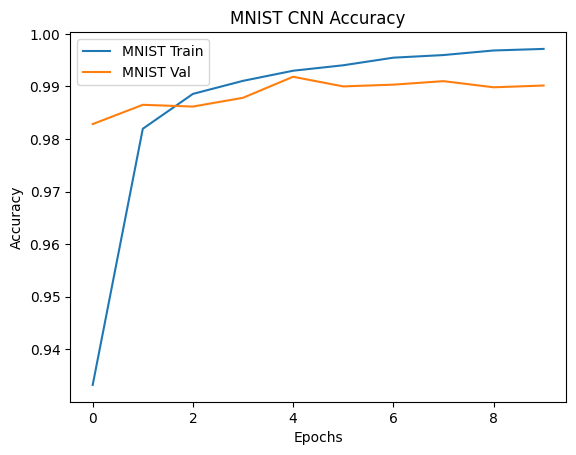

In [20]:
plt.plot(history_mnist.history['accuracy'], label='MNIST Train')
plt.plot(history_mnist.history['val_accuracy'],label='MNIST Val')
plt.title('MNIST CNN Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### CIFAR-10

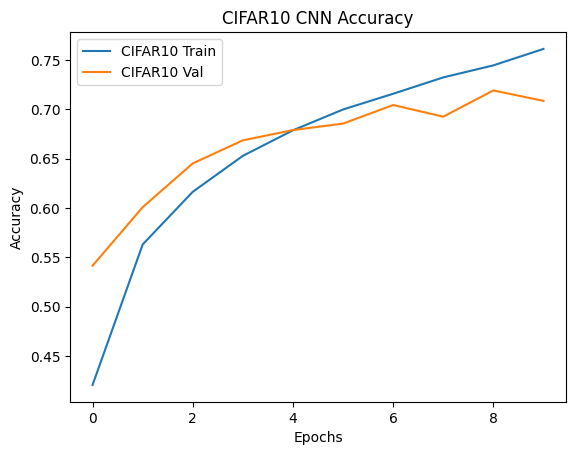

In [21]:
plt.plot(history_cifar10.history['accuracy'], label='CIFAR10 Train')
plt.plot(history_cifar10.history['val_accuracy'], label='CIFAR10 Val')
plt.title('CIFAR10 CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Step 6: Notes for Assignments
* Why CNN> DFNN here: preservers spatial structure, better feature extraction.
* ReLU in Conv & Dense(hidden) -> avoids vanishing gradients.
* Softmax in output -> for multi-class probabilities